In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
data = pd.read_csv("perf_scimark_3.csv")

# strip spaces from each column name
data.columns = data.columns.str.strip()

In [84]:
data.sort_values(by="PBTIME")

,name,length,PEG2PEGTIME,PBTIME,ENGINETIME,Optimization took,nodes:,values:
273,"kernel: double[][] RandomMatrix(int,int,Random...",5,-1,-1,-1,-1,-1,-1
178,"LU: int factor(double[][],int[]) ...",37,-1,-1,-1,-1,808,2103
179,"LU: void solve(double[][],int[],double[]) ...",3,-1,-1,-1,-1,952,1558
284,"LU: int factor(double[][],int[]) ...",37,-1,-1,-1,-1,831,2051
141,"SOR: double execute(double,double[][],int) ...",21,-1,-1,-1,-1,1480,2170
...,...,...,...,...,...,...,...,...
0,FFT: double test(double[]) ...,11,33674,33302,353,33707,1805,1231
124,FFT: double test(double[]) ...,11,35835,34894,911,35866,1817,1227
275,"kernel: void CopyMatrix(double[][],double[][])...",15,46436,46090,330,46494,841,1942
186,FFT: double test(double[]) ...,11,104964,104503,440,105165,1789,1215


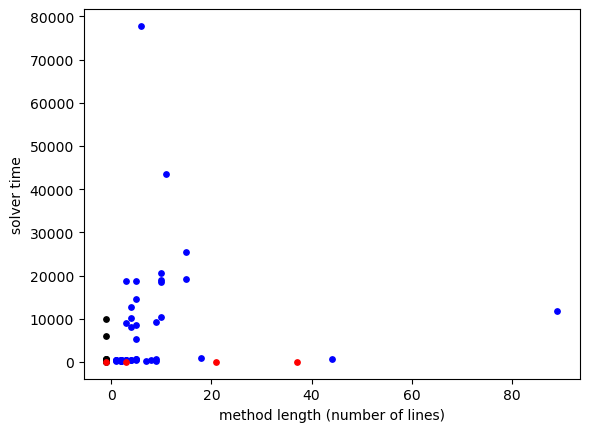

In [85]:
data = data.groupby("name").mean()
plt.xlabel("method length (number of lines)")
plt.ylabel("solver time")

# passing
work = data[data["PBTIME"] >= 0]
work = work[work["length"] >= 0]
plt.scatter(work["length"], work["PBTIME"], c = "blue", s=15)

# bad length
bad = data[(data["length"] < 0)]
plt.scatter(bad["length"], bad["PBTIME"], c = "black", s=15)

# failing
fail = data[(data["PBTIME"] < 0)]
plt.scatter(fail["length"], fail["PBTIME"], c = "red", s=15)

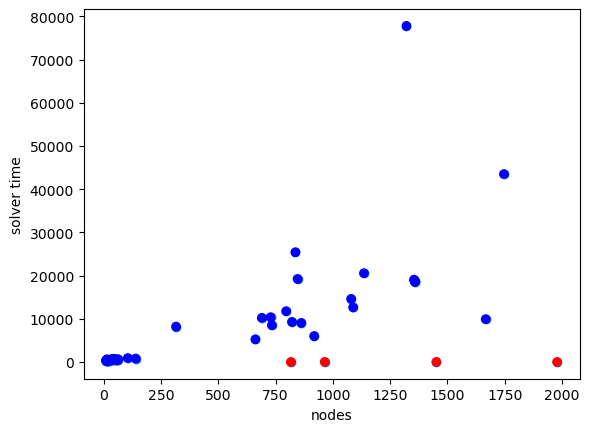

In [86]:
data = data.groupby("name").mean()
plt.scatter(data["nodes:"], data["PBTIME"])
plt.xlabel("nodes")
plt.ylabel("solver time")

# Color all dots below 0 on y axis as red
colors = ['red' if y < 0 else 'blue' for y in data["PBTIME"]]
plt.scatter(data["nodes:"], data["PBTIME"], c=colors)

(array([39.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  3.,  6.,  1.,  2.,  0.,
         2.,  2.,  0.,  1.,  2.,  0.,  2.]),
 array([   9.  ,  115.39,  221.78,  328.17,  434.56,  540.95,  647.34,
         753.73,  860.12,  966.51, 1072.9 , 1179.29, 1285.68, 1392.07,
        1498.46, 1604.85, 1711.24, 1817.63, 1924.02, 2030.41, 2136.8 ]),
 <BarContainer object of 20 artists>)

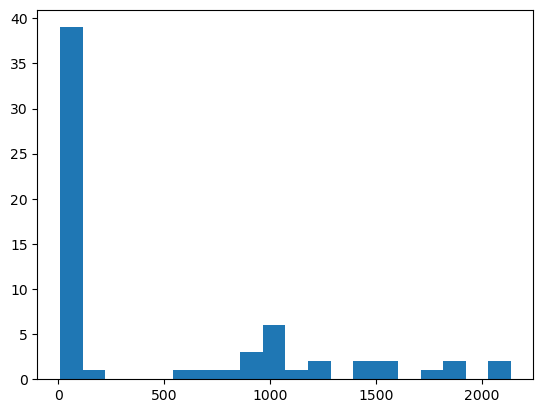

In [87]:
# make a histogram of solver time
plt.hist(data["values:"], bins=20)

In [51]:
data = pd.read_csv("perf_compress_2.csv")

# strip spaces from each column name
data.columns = data.columns.str.strip()

In [53]:
data.sort_values(by="nodes:")

,length,PEG2PEGTIME,PBTIME,ENGINETIME,Optimization took,nodes:,values:
name,,,,,,,
OutputBuffer: int getLength(),1.0,405.6,372.2,2.2,417.4,9.0,9.0
CompBase: int getMaxCode(),1.0,402.0,353.8,9.2,419.2,12.0,12.0
CodeTable: int of(int),1.0,429.6,394.0,8.0,445.4,16.0,16.0
"CodeTable: void set(int,int)",1.0,415.6,375.8,5.0,426.0,16.0,16.0
Harness: long inst_main(int),3.0,824.6,703.0,16.2,844.2,19.0,19.0
OutputBuffer: void writeByte(byte),1.0,540.4,490.6,20.2,549.2,22.0,21.0
OutputBuffer: long getCRC(),3.0,558.6,517.2,5.8,578.6,30.0,30.0
InputBuffer: int readByte(),1.0,744.2,653.8,30.6,815.0,37.0,34.0
Compressor: void clBlock(),21.0,1022.6,954.8,27.0,1150.8,79.0,76.0


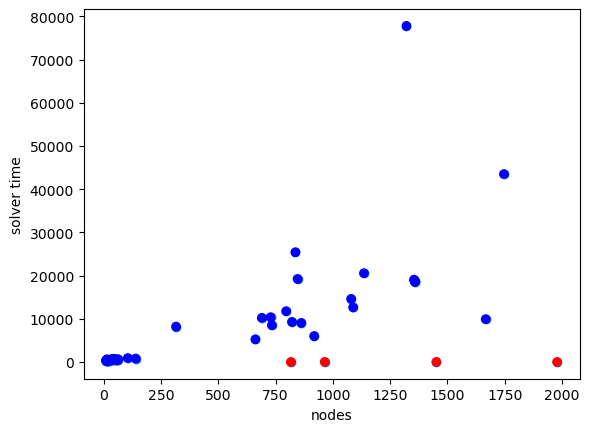

In [88]:
data = data.groupby("name").mean()
plt.scatter(data["nodes:"], data["PBTIME"])
plt.xlabel("nodes")
plt.ylabel("solver time")

# Color all dots below 0 on y axis as red
colors = ['red' if y < 0 else 'blue' for y in data["PBTIME"]]
plt.scatter(data["nodes:"], data["PBTIME"], c=colors)